In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time

from IPython.display import Image  
#%matplotlib inline
%matplotlib notebook
params = {'legend.fontsize': 14,
          'figure.figsize': (8, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}

plt.rcParams.update(params) 

# Mezclador activo.

El mezclador pasivo más utilizado es el mezclador de diodo doble balanceado. 
Su rango dinámico, figura de ruido moderada y buen rendimiento general lo convierten en una opción popular. 
Sin embargo, es imposible evitar su pérdida de conversión. 
Aquí es donde entran en juego los mezcladores activos. 
No solo pueden proporcionar ganancia, sino que también necesitan menos potencia de accionamiento LO para funcionar. 

Cubrir cada arquitectura de mezclador activo no sería muy útil, solo hay dos formas en que los dispositivos activos se pueden usar para crear un mezclador: por acción de conmutación como en el mezclador de diodo doble balanceado, o explotando la no linealidad de un dispositivo activo para aproximar la multiplicación.


## Mezclador empleando un JFET


![ex 2.13](/fig/jfet_basic.png)

Si bien es probable que sea el circuito más simple de construir, cómo es capaz de multiplicar señales no es nada intuitivo. Este es uno de los pocos mezcladores activos que realmente no depende de la conmutación, sino que explota la característica no lineal de un JFET. El análisis del circuito revelará cómo exactamente este circuito puede multiplicar señales.

Primero, recordemos la ecuación característica de un JFET, que vincula el voltaje de la puerta-fuente con la corriente de drenaje de salida:


El presente ejercicio se muestra el funcionamiento del mezclador JFET simple.  

La figura muestra el circuito de un mezclador  a FET y el circuito equivalente del elemento activo. 

![ex 2.13](mezclador_FET.PNG)



Datos de los mismos son:

$V_{gen}$ : sinusoide pura con $V_{pico}= 10 \mu V$ y frecuencia $10 MHz$. 

$V_{ol}$: sinusoide pura con $V_{pico}= 1 V$  y frecuencia $11 MHz$.

Los capacitores de acople CA son cortocircuitos a todas las frecuencias de interés. 

Los elementos reactivos no tienen pérdidas. Todos los tanques operan con $Q= 100$. 

El tanque L1/C1 resuenan a $10 MHz$.

El tanque L2/C2 resuenan a $11 MHz$.

El tanque L3/C3 resuenan a $1 MHz$.

$R_L= 10 K\Omega$ y $R_{gen} = 1 K\Omega$.

El FET puede considerarse cuadrático con $I_{dss}= 10 mA$ y  $V_p=-5V$.

$Y_{22}= (50+j0) \mu S$.


Determinar:
1. $R_S$ para $I_{dq}= 5 mA$
2. Valor pico de la componente de $V_{R_L}$ \@ $1 MHz$
3. Valor pico de la componente de $V_{R_L}$ \@ $10 MHz$
4. Valor pico de la componente de $V_{R_L}$ \@ $11 MHz$
5. Valor pico de la componente de $V_{R_L}$ \@ $2 MHz$
6. Valor pico de la componente de $V_{R_L}$ \@ $22 MHz$
7. Potencia entregada por el oscilador local


# 1. $R_s$

La respuesta de corriente para un FET de respuesta cuadratica 

$$I_{dq} = I_{DSS} \cdot (1 - \frac{V_{GS}}{V_P})^2$$

Despejando 

$$V_{GS} = V_P \cdot (\sqrt{\frac{I_{dq}}{I_{DSS} }} + 1)$$

$$V_{GS} = -5V \cdot (\sqrt{\frac{5 mA}{10 mA}} + 1)$$

$$V_{GS} = -3.53 V$$

Si $V_G = 0V$

$$V_S = 3.53 V$$

$$V_S = I_{ds} \cdot R_S$$

$$R_S = \frac{V_S}{I_{ds}} = \frac{3.53 V}{5 mA} = 707 \Omega$$




# 2.  

## Corriente $I_d$ dada las variaciones de $V_{OL}$


De la respuesta cuadratica del FET

$$I_{dq} = I_{DSS} \cdot (1 - \frac{V_{GS}}{V_P})^2$$

Remplazando por $V_{GS} = - V_{pol}  - V_{OL} \cdot cos(\omega_{OL} t)$

$$I_{dq} = I_{DSS} \cdot (1 + \frac{ V_{pol} + V_{OL} \cdot cos(\omega_{OL} t)}{V_P})^2$$

Operando aritmeticamente

$$I_{dq} = \frac{I_{DSS}}{V_p} \cdot [(V_p + V_{pol})^2 + 2  \cdot (V_p + V_{pol}) \cdot V_{OL} \cdot cos(\omega_{OL} t) + V_{OL}^2 \cdot cos^2(\omega_{OL} t)] $$

Usando la identidad trigonometrica $cos^2(\omega_{OL} t) = \frac{1}{2} + \frac{1}{2}  \cdot cos(2 \cdot \omega_{OL} t)$

$$I_{dq} = \frac{I_{DSS}}{V_p} \cdot [(V_p + V_{pol})^2 + 2  \cdot (V_p + V_{pol}) \cdot V_{OL} \cdot cos(\omega_{OL} t) + V_{OL}^2 \cdot (\frac{1}{2} + \frac{1}{2}  \cdot cos(2 \cdot \omega_{OL} t))] $$


$$I_{dq} = \frac{I_{DSS}}{V_p} \cdot [(V_p + V_{pol})^2 + \frac{V_{OL}^2}{2} + 2  \cdot (V_p + V_{pol}) \cdot V_{OL} \cdot cos(\omega_{OL} t) +  \frac{V_{OL}^2}{2}  \cdot cos(2 \cdot \omega_{OL} t))] $$


## Transconductancia $g_m$

La transconductancia $g_m$ se puede calcular como 


$$g_m = \frac{dI_{dq}}{d V_{GS}} = -2 \cdot \frac{I_{DSS}}{V_P} \cdot (1 - \frac{V_{GS}}{V_P})$$


Siendo $V_{GS} = - V_{pol}  - V_{OL} \cdot cos(\omega_{OL} t)$,  la transconductancia instantanea entonces


$$g_m(t) =  -2 \frac{I_{DSS}}{V_P} \cdot ( 1 + \frac{( V_{pol}  + V_{OL} \cdot cos(\omega_{OL} t))}{V_P} )$$


$$g_m(t) =   \frac{-2 \cdot I_{DSS}}{V_P} \cdot ( 1 + \frac{V_{pol}}{V_P} ) -  \frac{2 \cdot I_{DSS}\cdot V_{OL}}{V_P^2}  \cdot cos(\omega_{OL} t)$$


$$g_m(t) =  -28.28 mS +  8 mS  \cdot cos(\omega_{OL} t)$$











-----------

$$g_m = -2 \cdot \frac{I_{DSS}}{V_P^2} \cdot (V_{GS} - \frac{V_{GS}^2}{V_P})$$


Siendo $V_{GS} = - V_{pol}  - V_{OL} \cdot cos(\omega_{OL} t)$,  la transconductancia instantanea entonces

$$g_m(t) =  \frac{2 \cdot I_{DSS}}{V_P^2} \cdot ( V_{pol}  + V_{OL} \cdot cos(\omega_{OL} t) + \frac{(- V_{pol}  - V_{OL} \cdot cos(\omega_{OL} t))^2}{V_P} )  $$



$$g_m(t) =  \frac{2 \cdot I_{DSS}}{V_P^2} \cdot ( V_{pol}  + V_{OL} \cdot cos(\omega_{OL} t) + \frac{V_{pol}^2}{V_P} + \frac{2 V_{pol} V_{OL} \cdot cos(\omega_{OL} t) }{V_P} +      \frac{V_{OL}^2 \cdot cos(\omega_{OL} t))^2}{V_P} )  $$


$$g_m(t) =  \frac{2 \cdot I_{DSS}}{V_P^2} \cdot ( V_{pol}  + V_{OL} \cdot cos(\omega_{OL} t) + \frac{V_{pol}^2}{V_P} + \frac{2 V_{pol} V_{OL} \cdot cos(\omega_{OL} t) }{V_P} +      \frac{V_{OL}^2 \cdot cos(\omega_{OL} t))^2}{V_P} )  $$


Usando la identidad trigonometrica $cos^2(\omega_{OL} t) = \frac{1}{2} + \frac{1}{2}  \cdot cos(2 \cdot \omega_{OL} t)$

$$g_m(t) =  \frac{2 \cdot I_{DSS}}{V_P^2} \cdot ( V_{pol}  + V_{OL} \cdot cos(\omega_{OL} t) + \frac{V_{pol}^2}{V_P} + \frac{2 V_{pol} V_{OL} \cdot cos(\omega_{OL} t) }{V_P} +      \frac{V_{OL}^2 \cdot(\frac{1}{2} + \frac{1}{2}  \cdot cos(2 \cdot \omega_{OL} t))}{V_P} )  $$


$$g_m(t) =  \frac{2 \cdot I_{DSS}}{V_P^2} \cdot ( V_{pol}  + V_{OL} \cdot cos(\omega_{OL} t) + \frac{V_{pol}^2}{V_P} + \frac{2 V_{pol} V_{OL} \cdot cos(\omega_{OL} t) }{V_P} +      \frac{(V_{OL}^2  + V_{OL}^2   \cdot cos(2 \cdot \omega_{OL} t))}{2 V_P} ) $$

$$g_m(t) =  \frac{2 \cdot I_{DSS}}{V_P^2} \cdot [  (\frac{V_{OL}^2}{2V_P} + \frac{V_{pol}^2}{V_P} + V_{pol})  + (\frac{2 V_{pol} V_{OL}}{V_P}   + V_{OL}) \cdot cos(\omega_{OL} t) +     ( \frac{ V_{OL}^2 }{2 V_P} ) \cdot cos(2 \cdot \omega_{OL} t)]   $$

$$g_m(t) = 8m [ 0.937 - 0.412 cos(\omega_{OL} t) -  0.1 \cdot cos(2 \omega_{OL} t) ]$$



Las variaciones de $v_{gen}$ no afectan al punto de operación del dispositivo. 

Por lo tanto, el calculo de $I_{ds}(t)$

$$I_{ds}(t) = g_m(t) \cdot V_{gen}(t)$$









In [108]:
# Plot de la transferencia del MOSFET
def plotFFT(x,dt, l = 'x'):
    Y   = fft(x) / len(x)     # Normalizada
    frq = fftfreq(len(x), dt)  # Recuperamos las frecuencias
    plt.stem(frq, (Y) )  
    #plt.ylim(-0.1, 0.8)
    plt.xlabel('$Frecuencia/Hz$')
    plt.minorticks_on()
    plt.grid(b=True ,which='both', linestyle='-',alpha=0.25)
    #plt.show()

In [123]:
## Datos 

# vs
Ids = 5e-3
vol = 1
fol  = 11e6
wol  = 2*np.pi*fol


# vgen
vg   = 10e-6
fs  = 10e6
ws  = 2*np.pi*fs

# Transistor
Idss = 10e-3
Vp   = -5


L = 1e3/(2*np.pi*1e6*1000)
print(L)
C =1/(L*(2*np.pi*1e6)**2)
print(C)

## Rpol
# corriente id1
def Rp(Ids, Vp, Idss):
    return Vp*((Idss/Ids)**.5+1) 
    

## Para el procesamiento de senales!!
fsa   = 110e6  # sampleo: máxima frecuencia del espectro fsa/2 
dt    = 1/fsa

fmin  = 1e6   # pasos en frecuencias del espectro (frecuencia mínima) 
Ts    = 1/(fmin)

t   = np.arange(0,Ts,dt) # vector tiempo

1.5915494309189535e-07
1.5915494309189535e-07


1.4644660940672622
-0.0028284271247461905
0.0008


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


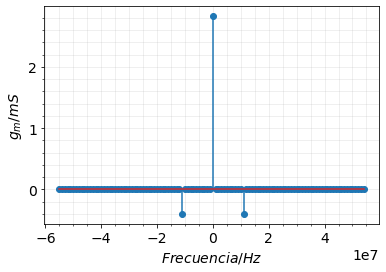

In [112]:
# Vol
%matplotlib inline 
#notebook

vpol   = -Vp*(1-(5e-3/Idss)**.5)

print(vpol)

print(2*Idss/Vp *(1  + vpol/Vp))

print(2*Idss/Vp**2 )

Vgs   = -vpol -1*np.cos(wol*t) 


Ids  = Idss*(1-Vgs/Vp)**2



gm  =-2*Idss/Vp*(1-Vgs/Vp)



## FFT! 
plotFFT((gm)/1e-3, dt, '$g_{m}/mS$' )
plt.ylabel('$g_{m}/mS$')

plt.show()



/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


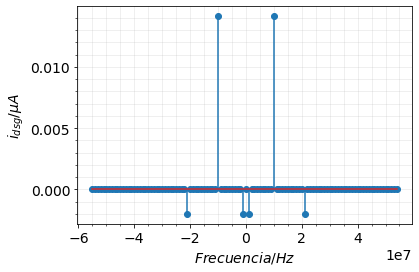

In [119]:
vgt  = 10e-6
vgt  = vg*np.cos(ws*t)


ids = gm * vgt 

## FFT! 
plotFFT(ids/1e-6, dt, l ='$i_{dsg}$' )
plt.ylabel('$i_{dsg}/ \mu A$')
plt.show()

<IPython.core.display.Javascript object>


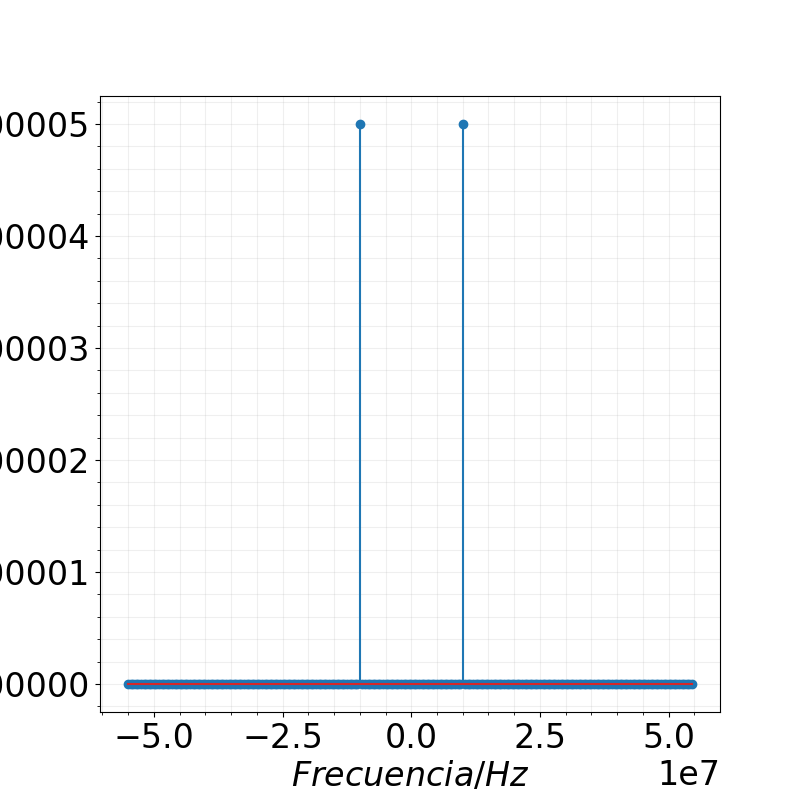

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


In [84]:
# Vol



## FFT! 
plotFFT(vgt, dt, '$v_{gen}$' )
plt.show()
